In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from correlation import c_clustering
from collections import defaultdict

In [92]:
import networkx as nx
from tqdm import trange
from fairness_goodness_computation import *
import csv 

Data = open('soc-sign-bitcoinotc.csv', "r")
next(Data, None)  # skip the first line in the input file
Graphtype = nx.DiGraph()

G = nx.parse_edgelist(Data, delimiter=',', create_using=Graphtype, nodetype=int, data=(('Weight', int),('Timestamp', int)))

# Setting weights -1 to 1
weights = nx.get_edge_attributes(G,"Weight")
for key, val in weights.items():
    weights[key] = val/10
nx.set_edge_attributes(G, weights, "Weight")

In [132]:
Data = open('soc-sign-bitcoinotc.csv', "r")
next(Data, None)  # skip the first line in the input file
graph_type = nx.DiGraph()
df = pd.read_csv("soc-sign-bitcoinotc.csv")

df = df.sort_values(by = "Timestamp")

df.Weight /= 10
# df.Weight = df.Weight - df.Weight.mean() 
print(df.head())
split = int(0.1*len(df))
train = df.iloc[:split,:]
test = df.iloc[split:,:]

G = nx.from_pandas_edgelist(train,
                            source='Source',
                            target='Target',
                            edge_attr='Weight',
                            create_using=graph_type)

H = G.copy()

   Source  Target  Weight   Timestamp
0       6       2     0.4  1289241912
1       6       5     0.2  1289241942
2       1      15     0.1  1289243140
3       4       3     0.7  1289245277
4      13      16     0.8  1289254254


In [133]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 817
Number of edges: 3559
Average in degree:   4.3562
Average out degree:   4.3562


In [134]:
# H = G.subgraph(list(G.nodes)[:200])
# nodes = []
# WW = nx.get_edge_attributes(G,"Weight")
# count = 0
# for i in (G.edges):
#     if(WW[i] < 0):
#         nodes.append(i[0])
#         nodes.append(i[1])
#         count+=2
#     if(count == 1800):
#         break
# H = G.subgraph(nodes)
# nx.info(H)

In [135]:
CC = c_clustering(H.copy(), delta = 1/5)

In [136]:
clusters = CC.run()

CLUSTER:  63
CLUSTER:  1
CLUSTER:  1
CLUSTER:  1
CLUSTER:  500
CLUSTER:  54
CLUSTER:  3
CLUSTER:  1
CLUSTER:  2
CLUSTER:  1
CLUSTER:  1
CLUSTER:  2
CLUSTER:  1
CLUSTER:  1
CLUSTER:  2
CLUSTER:  1
CLUSTER:  1
CLUSTER:  30
CLUSTER:  1
CLUSTER:  1
CLUSTER:  1
CLUSTER:  1
CLUSTER:  1
CLUSTER:  1
CLUSTER:  2
CLUSTER:  18
CLUSTER:  7
CLUSTER:  2
CLUSTER:  1
CLUSTER:  2
CLUSTER:  2
CLUSTER:  74
CLUSTER:  1
CLUSTER:  2
CLUSTER:  2
CLUSTER:  1
CLUSTER:  1
CLUSTER:  15
CLUSTER:  1
CLUSTER:  1
CLUSTER:  2
CLUSTER:  11


In [137]:
dic = dict(zip(range(len(clusters)), clusters))

In [138]:
import numpy as np
pos = nx.circular_layout(H)   # replaces your original pos=...
# prep center points (along circle perimeter) for the clusters
angs = np.linspace(0, 2*np.pi, 1+len(dic.keys()))
repos = []
rad = 3.5     # radius of circle
for ea in angs:
    if ea > 0:
        #print(rad*np.cos(ea), rad*np.sin(ea))  # location of each cluster
        repos.append(np.array([rad*np.cos(ea), rad*np.sin(ea)]))
for ea in pos.keys():
    posx = 0
    for i in dic.keys():
        if(ea in dic[i]):
            posx = i
    #print(ea, pos[ea], pos[ea]+repos[posx], color, posx)
    pos[ea] += repos[posx]

In [139]:
pos

{6: array([-1.18221431, -2.73641019]),
 2: array([-2.46093746, -0.51395745]),
 5: array([3.56556324, 2.39598509]),
 1: array([-2.50026613,  0.02306963]),
 15: array([-2.15386418,  1.54935046]),
 4: array([-1.18295352, -2.69796688]),
 3: array([4.45984347, 0.5677749 ]),
 13: array([ 1.26010664, -3.43640539]),
 16: array([4.45901586, 0.58313358]),
 10: array([-1.56807593, -2.31144482]),
 7: array([2.74704421, 3.1079187 ]),
 21: array([ 1.25797923, -3.40571803]),
 20: array([4.45665248, 0.61380368]),
 8: array([3.56068799, 2.48041536]),
 17: array([-0.75579059, -2.92362901]),
 23: array([-2.16003743,  1.63369576]),
 25: array([4.45334692, 0.64438657]),
 26: array([3.5571473 , 2.51097194]),
 28: array([3.17264818, 2.87439852]),
 29: array([4.48934335, 0.14560117]),
 31: array([3.5538759 , 2.53380996]),
 32: array([3.55266849, 2.54140513]),
 34: array([3.55140266, 2.54899077]),
 35: array([ 1.24595232, -3.31425141]),
 36: array([-0.76698536,  3.21461609]),
 37: array([ 0.20275091, -3.221166

In [140]:
nodes_dic = {}
for u in dic.keys():
    v = dic[u]
    for i in v:
        nodes_dic[i] = u    

{3: Text(4.459843472041488, 0.5677749049538285, '0'),
 260: Text(3.3783285621142163, 1.5182324071663935, '0'),
 263: Text(3.3553597334347303, 1.5160621424453486, '0'),
 264: Text(3.3477153408842875, 1.5152210016982288, '0'),
 16: Text(4.459015861548734, 0.5831335839512976, '0'),
 19: Text(4.43614049295226, 0.7428297717847291, '0'),
 20: Text(4.456652477778604, 0.6138036791882161, '0'),
 281: Text(3.2042561027638516, 1.4881518502951123, '0'),
 25: Text(4.453346923388456, 0.644386569104533, '0'),
 545: Text(2.6885840448663814, -0.11358105947878927, '0'),
 806: Text(4.363065079244031, 0.0902403910051125, '0'),
 551: Text(2.806575611531362, -0.2345592360797064, '0'),
 553: Text(2.729102745945279, -0.15986597349824327, '0'),
 302: Text(3.0662670883685808, 1.4404833932610501, '0'),
 819: Text(4.401619270835661, 0.18243989538600924, '0'),
 315: Text(2.969814315745551, 1.3927547355357615, '0'),
 829: Text(4.422826305424772, 0.2483112831100031, '0'),
 831: Text(4.426916674172725, 0.263138623952

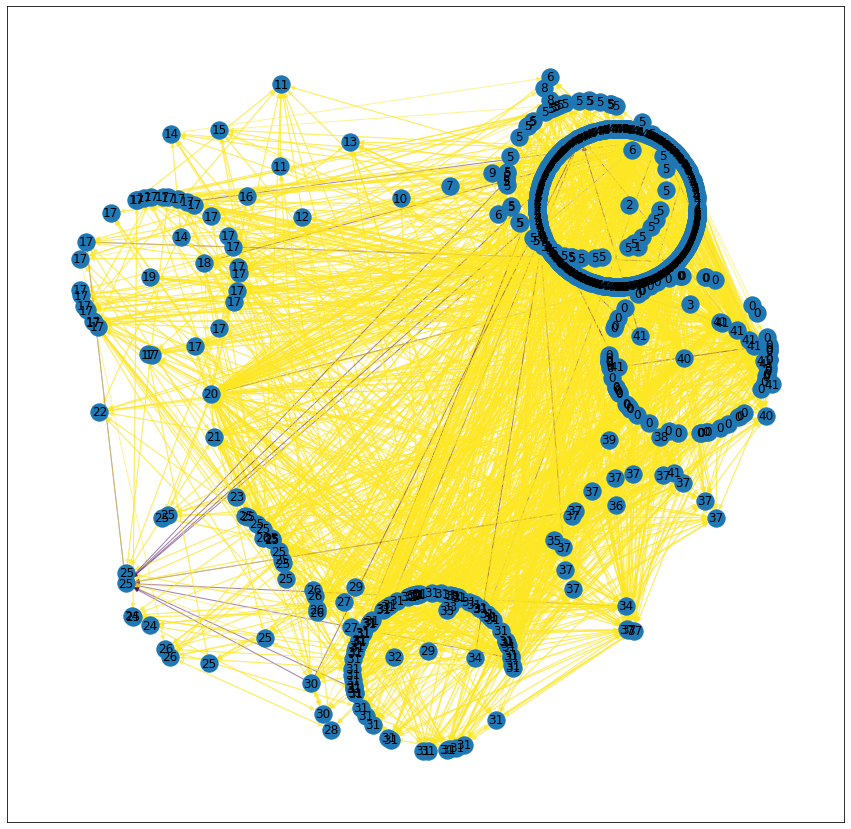

In [141]:
colos = list((np.array(list(nx.get_edge_attributes(H,"Weight").values()) ) > 0).astype(int))
plt.figure(figsize = (15,15))
nx.draw_networkx_nodes(H, pos = pos)
nx.draw_networkx_edges(H, pos = pos, width=1.0, alpha=0.5, edge_color = colos)#, edge_cmap = plt.cm.binary)
nx.draw_networkx_labels(H, labels = nodes_dic, pos = pos)
# nx.draw_networkx_labels(H, labels = dict(zip(list(H.nodes), list(H.nodes))), pos = pos)

In [142]:
weights = nx.get_edge_attributes(H,"Weight")
inside_p = defaultdict(int)
outside_p = defaultdict(int)
inside_n = defaultdict(int)
outside_n = defaultdict(int)
for i in range(len(clusters)):
    for u in clusters[i]:
        for v in H.neighbors(u):
            if(v in clusters[i]):
                if(weights[(u,v)] > 0):
                    inside_p[i] += weights[(u,v)]
                else:
                    inside_n[i] += weights[(u,v)]
            else:
                if(weights[(u,v)] > 0):
                    outside_p[i] += weights[(u,v)]
                else:
                    outside_n[i] += weights[(u,v)]

In [143]:
print(inside_p)
print(inside_n)
print(outside_p)
print(outside_n )

defaultdict(<class 'int'>, {4: 25.900000000000027, 5: 4.000000000000001, 6: 1.1, 8: 0.4, 11: 0.2, 14: 0.4, 17: 3.7, 24: 0.2, 25: 0.5, 26: 2.9000000000000004, 27: 0.2, 29: 0.2, 30: 0.2, 31: 24.70000000000004, 33: 0.4, 34: 0.4, 37: 3.8000000000000003, 40: 0.6000000000000001, 41: 9.799999999999995})
defaultdict(<class 'int'>, {4: -3.3})
defaultdict(<class 'int'>, {0: 0.1, 1: 0.8, 2: 0.1, 3: 0.2, 4: 125.79999999999917, 5: 44.90000000000013, 6: 33.20000000000001, 7: 0.8999999999999999, 8: 1.4000000000000006, 9: 1.5, 10: 1.0, 11: 1.9000000000000001, 12: 2.1000000000000005, 13: 2.0, 14: 1.9999999999999998, 15: 1.4, 16: 0.4, 17: 32.50000000000002, 18: 1.7000000000000004, 19: 1.5000000000000002, 20: 18.19999999999999, 21: 8.199999999999998, 22: 1.5, 23: 1.9000000000000004, 24: 0.8, 25: 23.00000000000001, 26: 16.79999999999999, 27: 3.9000000000000004, 28: 1.0, 29: 1.9000000000000001, 30: 4.1, 31: 93.29999999999968, 32: 1.0, 33: 2.700000000000001, 34: 8.699999999999992, 35: 2.4000000000000004, 36

In [144]:
outdegs = defaultdict(int)
for i in range(len(clusters)):
    for u in clusters[i]:
        outdegs[i]+=H.out_degree(u)
outdegs

defaultdict(int,
            {0: 1,
             1: 5,
             2: 1,
             3: 2,
             4: 829,
             5: 272,
             6: 150,
             7: 7,
             8: 11,
             9: 4,
             10: 8,
             11: 14,
             12: 8,
             13: 10,
             14: 14,
             15: 8,
             16: 4,
             17: 190,
             18: 16,
             19: 7,
             20: 90,
             21: 30,
             22: 10,
             23: 6,
             24: 9,
             25: 121,
             26: 79,
             27: 18,
             28: 4,
             29: 16,
             30: 25,
             31: 688,
             32: 8,
             33: 25,
             34: 62,
             35: 15,
             36: 18,
             37: 236,
             38: 21,
             39: 16,
             40: 125,
             41: 376})

In [146]:
metrics = [(inside_p[i]+abs(outside_n[i]-outside_p[i]-abs(inside_n[i]))) for i in range(len(clusters))]
metrics

[0.1,
 0.8,
 0.1,
 0.2,
 156.3999999999992,
 49.90000000000013,
 34.70000000000001,
 0.8999999999999999,
 1.8000000000000007,
 1.5,
 1.0,
 2.1,
 2.1000000000000005,
 2.0,
 2.4,
 1.4,
 0.4,
 38.300000000000026,
 1.8000000000000005,
 1.5000000000000002,
 18.69999999999999,
 8.199999999999998,
 1.5,
 1.9000000000000004,
 1.0,
 23.50000000000001,
 19.69999999999999,
 4.1000000000000005,
 1.0,
 2.1,
 6.3,
 121.19999999999973,
 1.0,
 3.100000000000001,
 11.099999999999993,
 2.4000000000000004,
 2.6000000000000005,
 37.60000000000006,
 2.400000000000001,
 2.0000000000000004,
 45.60000000000002,
 77.50000000000023]